In [1]:
%run setup.py

In [2]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

# This person is an outlier, so we remove him from the analysis
df_Invited = df_Invited[df_Invited['Full name'] != "Wei Wei"]
df_Invited.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic
0,Atsushi Asada,1995,ASPDAC,Atsushi,NaN,Asada,M,0,1,2011,0,Asia and South Pacific Design Automation Confe...,Computer Architecture
1,Jim Meadlock,1995,ASPDAC,Jim,NaN,Meadlock,M,0,0,0,0,Asia and South Pacific Design Automation Confe...,Computer Architecture
2,John Darringer,1995,ASPDAC,John,NaN,Darringer,M,11,27,1967,28,Asia and South Pacific Design Automation Confe...,Computer Architecture
3,Tatsuo Izawa,1997,ASPDAC,Tatsuo,NaN,Izawa,M,0,1,2018,0,Asia and South Pacific Design Automation Confe...,Computer Architecture
4,Daniel D. Gajski,1997,ASPDAC,Daniel,D.,Gajski,M,119,222,1978,19,Asia and South Pacific Design Automation Confe...,Computer Architecture


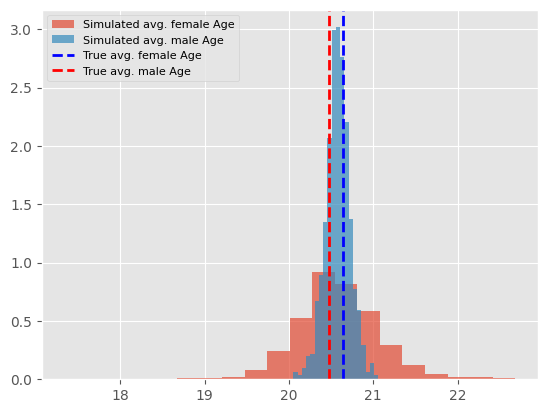

In [72]:
def statistical_test(df,n,column): 
    # Drop all rows with 0 values
    df = df[df[column] != 0]
    
    # initialize the lists to store the averages
    avg_F = []
    avg_M = []

    for i in range(n):
        # calculate the proportion of each gender in the dataframe
        prop_F = len(df[df['gender'] == 'F']) / len(df)
        prop_M = len(df[df['gender'] == 'M']) / len(df)

        # randomly assign a new gender to each row
        df['gender'] = np.random.choice(['F', 'M'], size=len(df), p=[prop_F, prop_M])

        # calculate and store the average Value for each gender
        avg_F.append(df[df['gender'] == 'F'][column].mean())
        avg_M.append(df[df['gender'] == 'M'][column].mean())
    
    
    # Plot the distribution of the averages
    plt.hist(avg_F, alpha=0.7, density=True, bins=20, label="Simulated avg. female "+column)
    plt.hist(avg_M, alpha=0.7, density=True, bins=20, label="Simulated avg. male "+column)
    plt.axvline(df[df['gender'] == 'M'][column].mean(), color='blue', linestyle='dashed', linewidth=2, label = "True avg. female "+column)
    plt.axvline(df[df['gender'] == 'F'][column].mean(), color='red', linestyle='dashed', linewidth=2, label = "True avg. male "+column)
    plt.legend( prop={'size': 8})
    plt.show()
statistical_test(df_Invited,1000,'Age')